# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
#Dependencies
import requests
import json
from api_keys import api_key
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pprint import pprint
import random
from citipy import citipy
import scipy.stats as st
import csv



In [2]:
#Urls and API Keys
url = "http://api.openweathermap.org/data/2.5/weather?"
#query_url = f"{url}appid={api_key}&units={units}&q="
#query_url = url + "appid=" + api_key + "&q={name}"
#query_url = url + "appid=" + api_key + "&q=houston" + "&units=imperial"

In [3]:
weather_response = requests.get(query_url)
weather_json = weather_response.json()
    
#print(query_url)
#pprint(weather_json)

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 29.76, 'lon': -95.36},
 'dt': 1599946411,
 'id': 4699066,
 'main': {'feels_like': 92.12,
          'humidity': 46,
          'pressure': 1010,
          'temp': 93.25,
          'temp_max': 96.01,
          'temp_min': 91},
 'name': 'Houston',
 'sys': {'country': 'US',
         'id': 4850,
         'sunrise': 1599912293,
         'sunset': 1599957026,
         'type': 1},
 'timezone': -18000,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 330, 'gust': 20.8, 'speed': 14.99}}


## Generate Cities List

In [4]:
#generating coordinates
#random.randint(0,9)
coordinates = [(random.uniform(-1, 1)*70, random.uniform(-1, 1)*70) for _ in range(600)]
#coord_df = pd.DataFrame(coordinates)
#coordinates_df= coord_df.rename(columns={"0":"Latitude", "1":"Longitude"})
#coordinates_df
print(coordinates)

[(-17.50963409789501, -43.46952142873276), (49.836641187201366, -5.523248774382019), (-22.841394536614654, 20.746591416368823), (-33.27447798109228, 50.25953280601772), (49.08721529339148, -49.97564261252462), (-5.947728046012644, 65.94919962431243), (69.29083170689059, -59.89688112981931), (68.12540390979142, -65.90305119520269), (29.87142769371547, -21.186535120522237), (-0.654983998797809, 50.14099834144548), (-44.24236053416496, -38.560126110672755), (26.309451661732087, 58.78462538530212), (-2.0526593269458293, 9.305188278589299), (12.062611221521271, 51.75374716873018), (-4.9302646131576395, -62.406405378157416), (17.474054543201547, -0.15253033015106832), (-12.158607380985984, -59.95082258125043), (39.68958156099384, -67.88418507541162), (-15.167725633756268, -2.0227425752335404), (40.36382999226579, 0.21147797339963192), (-55.21167920163674, 30.679435004829717), (38.59052903737782, -53.27759819143762), (-69.84502643394846, 1.6081004166393154), (46.81324461234331, 26.35720022726

In [5]:
cities = []
for coordinate_pair in coordinates:
    lat, lon = coordinate_pair
    cities.append(citipy.nearest_city(lat, lon).city_name)
print(cities)


['bocaiuva', 'penzance', 'manyana', 'taolanaro', 'torbay', 'hithadhoo', 'upernavik', 'pangnirtung', 'los llanos de aridane', 'mogadishu', 'rio grande', 'minab', 'omboue', 'bereda', 'tapaua', 'gao', 'vilhena', 'nantucket', 'jamestown', 'benicarlo', 'port elizabeth', 'saint-pierre', 'hermanus', 'piatra soimului', 'carnarvon', 'hermanus', 'jamestown', 'vera cruz', 'cape town', 'souillac', 'sao filipe', 'ibra', 'saint-philippe', 'maiduguri', 'baykalovo', 'challapata', 'chuy', 'saint george', 'ugoofaaru', 'porto velho', 'mizdah', 'chuy', 'uvat', 'port alfred', 'kruisfontein', 'aflu', 'nanortalik', 'saldanha', 'ribeira grande', 'cape town', 'koryazhma', 'belyy', 'adrar', 'touros', 'bonthe', 'hermanus', 'port elizabeth', 'vila franca do campo', 'ambanja', 'posse', 'bredasdorp', 'vestmannaeyjar', 'mar del plata', 'cidreira', 'grindavik', 'jamestown', 'adrar', 'hermanus', 'bonavista', 'cayenne', 'bredasdorp', 'jamestown', 'georgetown', 'saint-philippe', 'trairi', 'mar del plata', 'jamestown', '

In [6]:
#All individual variables are reading the json response ap
#pressure = []
#lon = []
#lat = []
#cloud = []
#wind = []
#temp = []

#for city in cities:
    #response = requests.get(query_url + city).json()
response = weather_json
temp = response['main']['temp']
humidity = response['main']['humidity']
cloud = response['clouds']['all']
wind = response['wind']['speed']
print(cloud)
    #country_code = city.country_code
    #name = city.city_name
    #lon = lon.append(response['coord']['lon'])
    #lat = lat.append(response['coord']['lat'])
    #humidity = pressure.append(response['main']['humidity'])
    #cloud = cloudiness.append(response['clouds']['all'])
    
    #print(f"The country code of {name} is '{country_code}'.")

75


In [7]:
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = url + "appid=" + api_key +  "&units=imperial" +"&q="
lon = []
lat = []
cloud = []
wind = []
temp = []
humidity =[]
max_temp = []
country = []
date = []
name = []
count_sets = 1
cities_count = 1

for city in cities:
    #country_code = city.country_code
   
        
    #count_sets = (count_sets(cities_counts = 50)+1)
    request_url = query_url + city
    #print(cities_count)
    #flag to capture if city was not found
    isCityFound = True
    try:
        response = requests.get(request_url).json()
        
    #print(f"The country code of {name} is '{country_code}'.")
    #weather_response = requests.get(query_url)
    #weather_json = weather_response.json()
        lon.append(response['coord']['lon'])
        lat.append(response['coord']['lat'])
        humidity.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        max_temp.append(response['main']['temp_max'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        name.append(city)
        print(f"Processing Record ", cities_count , " of set " , count_sets, " | ", city)
    except KeyError:
        print("City not found. Skipping...") 
        isCityFound = False
        #print("removing " + {city.name})
        #cities.remove(city)
    if (cities_count < 50 and isCityFound == True):
        cities_count = cities_count + 1
    elif isCityFound == True: 
        cities_count = 0
        count_sets = count_sets + 1
#rint(cities)
#rint(lat)
    

Processing Record  1  of set  1  |  bocaiuva
Processing Record  2  of set  1  |  penzance
Processing Record  3  of set  1  |  manyana
City not found. Skipping...
Processing Record  4  of set  1  |  torbay
Processing Record  5  of set  1  |  hithadhoo
Processing Record  6  of set  1  |  upernavik
Processing Record  7  of set  1  |  pangnirtung
Processing Record  8  of set  1  |  los llanos de aridane
Processing Record  9  of set  1  |  mogadishu
Processing Record  10  of set  1  |  rio grande
Processing Record  11  of set  1  |  minab
Processing Record  12  of set  1  |  omboue
Processing Record  13  of set  1  |  bereda
City not found. Skipping...
Processing Record  14  of set  1  |  gao
Processing Record  15  of set  1  |  vilhena
Processing Record  16  of set  1  |  nantucket
Processing Record  17  of set  1  |  jamestown
Processing Record  18  of set  1  |  benicarlo
Processing Record  19  of set  1  |  port elizabeth
Processing Record  20  of set  1  |  saint-pierre
Processing Reco

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
weather_data = {"City": name, "Lat": lat, "Lng": lon, "Max Temp": max_temp, "Humidity": humidity, "Cloudiness": cloud, "Wind Speed": wind, "Country": country, "Date": date}
weather_data = pd.DataFrame(weather_data)
weather_data

weather_data.to_csv("cityDataFile.csv", sep=',')

In [9]:
#Weather Stats
weather_stats = weather_data.describe()
weather_stats

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,5.660000e+02
mean,9.087155,-1.490671,67.632261,69.565371,44.872792,8.286837,1.599947e+09
std,34.680788,51.612842,13.403082,20.509401,36.945615,5.266778,1.984579e+02
min,-54.800000,-121.980000,33.620000,9.000000,0.000000,0.740000,1.599946e+09
25%,-21.360000,-50.877500,59.000000,63.000000,6.250000,4.067500,1.599947e+09
50%,6.505000,7.240000,69.800000,74.000000,40.000000,7.260000,1.599947e+09
75%,41.932500,36.890000,77.000000,85.000000,82.000000,11.410000,1.599947e+09
max,72.790000,141.970000,99.770000,100.000000,100.000000,26.840000,1.599947e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
    low_humidity = weather_stats.iloc[7]['Humidity']
    low_humidity
    if low_humidity < 100:
        print("All cities under 100% humidity")
        clean_data_df = weather_data
    else:
        #TODO remove cities that have humidity value greather than 100
        print("One or more cities greater than 100% humidity")
        clean_data_df =weather_data

clean_data_df
    #humidity_df = mouse_data_nodupes_df[mouse_data_nodupes_df['Drug Regimen'] == drug]


One or more cities greater than 100% humidity


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bocaiuva,-17.11,-43.81,82.40,24,0,12.75,BR,1599946895
1,penzance,50.12,-5.54,59.00,100,86,6.93,GB,1599946593
2,manyana,-23.40,21.72,59.90,31,0,8.37,BW,1599946895
3,torbay,47.67,-52.73,57.00,54,20,16.11,CA,1599946524
4,hithadhoo,-0.60,73.08,81.68,73,25,7.29,MV,1599946519
...,...,...,...,...,...,...,...,...,...
561,nanortalik,60.14,-45.24,38.82,73,2,3.18,GL,1599946582
562,bonthe,7.53,-12.51,76.24,92,95,5.55,SL,1599946518
563,jamestown,42.10,-79.24,75.00,73,90,9.17,US,1599946460
564,luena,-11.78,19.92,63.46,30,29,5.21,AO,1599947007


In [11]:
#  Get the indices of cities that have humidity over 100%.


In [12]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

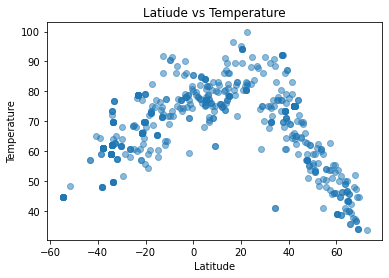

In [13]:
plt.title("Latiude vs Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.scatter(clean_data_df["Lat"], clean_data_df["Max Temp"], alpha = 0.5)
plt.savefig('lat_v_temp.png')


Latitude vs. Temperature Plot - Shows that temperatures are higher the closer to the equator (0) latitude and gets colder the farther away from the equator on either side of the line is colder.  

## Latitude vs. Humidity Plot

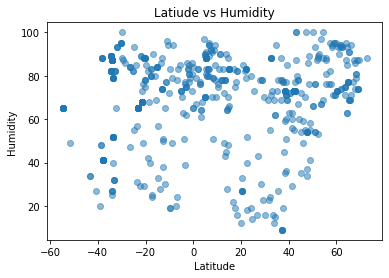

In [14]:
plt.title("Latiude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.scatter(clean_data_df["Lat"], clean_data_df["Humidity"], alpha = 0.5)
plt.savefig('lat_v_humid.png')


Latitude vs. Humidity Plot - There is no direct coorelation between Latitude and Humidity.  Regardless of the distance from the equator humidity can be high.  

## Latitude vs. Cloudiness Plot

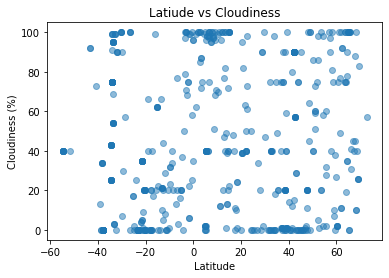

In [15]:
plt.title("Latiude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.scatter(clean_data_df["Lat"], clean_data_df["Cloudiness"], alpha = 0.5)
plt.savefig('lat_v_cloud.png')


Latitude vs. Cloudiness Plot - There is also no direct coorelation between Latitude and Cloud cover.  

## Latitude vs. Wind Speed Plot

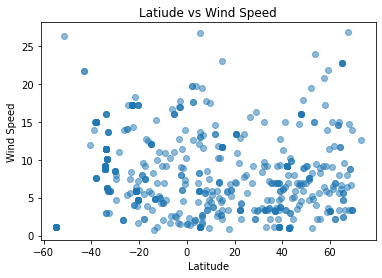

In [16]:
plt.title("Latiude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.scatter(clean_data_df["Lat"], clean_data_df["Wind Speed"], alpha = 0.5)
plt.savefig('lat_v_wind.png')


Latitude vs. Wind Speed Plot - There is also no direct coorelation between Latitude and wind speed cover.  

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [17]:
#Northern Hemisphere Calculations
northern_hemisphere_df = clean_data_df[clean_data_df['Lat'] > 0] 
northern_hemisphere_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,penzance,50.12,-5.54,59.00,100,86,6.93,GB,1599946593
3,torbay,47.67,-52.73,57.00,54,20,16.11,CA,1599946524
5,upernavik,72.79,-56.15,33.62,88,57,12.57,GL,1599946630
6,pangnirtung,66.15,-65.71,39.18,71,41,3.36,CA,1599946591
7,los llanos de aridane,28.66,-17.92,75.20,78,90,2.24,ES,1599946637
...,...,...,...,...,...,...,...,...,...
560,grong,64.47,12.31,43.21,85,78,6.17,NO,1599947006
561,nanortalik,60.14,-45.24,38.82,73,2,3.18,GL,1599946582
562,bonthe,7.53,-12.51,76.24,92,95,5.55,SL,1599946518
563,jamestown,42.10,-79.24,75.00,73,90,9.17,US,1599946460


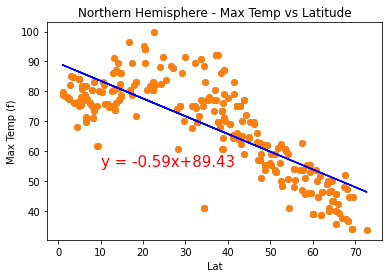

In [18]:
plt.scatter(northern_hemisphere_df["Lat"], northern_hemisphere_df["Max Temp"], alpha = 0.5)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(northern_hemisphere_df["Lat"],northern_hemisphere_df ["Max Temp"])
regress_values = (northern_hemisphere_df["Lat"]) * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x" + "+" + str(round(intercept,2))
plt.scatter(northern_hemisphere_df["Lat"],northern_hemisphere_df ["Max Temp"])
plt.plot(northern_hemisphere_df["Lat"],regress_values,"b-")
plt.annotate(line_eq,(10,55),fontsize=15,color="red")
plt.title("Northern Hemisphere - Max Temp vs Latitude")
plt.xlabel('Lat')
plt.ylabel('Max Temp (f)')
plt.savefig('northhem_maxtemp_lat.png')
plt.show()


Northern Hemisphere - Max Temp vs Latitude - This scatter plot is showing a pretty significant coorleation between between temperature the closer to the equator (0) latitiue the city is.  

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [19]:
#Southern Hemisphere - 
southern_hemisphere_df = clean_data_df[clean_data_df['Lat'] < 0] 
southern_hemisphere_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bocaiuva,-17.11,-43.81,82.40,24,0,12.75,BR,1599946895
2,manyana,-23.40,21.72,59.90,31,0,8.37,BW,1599946895
4,hithadhoo,-0.60,73.08,81.68,73,25,7.29,MV,1599946519
9,rio grande,-32.03,-52.10,57.20,93,90,5.82,BR,1599946832
11,omboue,-1.57,9.26,75.74,79,99,8.93,GA,1599946588
...,...,...,...,...,...,...,...,...,...
553,east london,-33.02,27.91,76.86,32,3,13.62,ZA,1599946952
554,cape town,-33.93,18.42,62.01,87,75,11.41,ZA,1599946373
556,ikalamavony,-21.15,46.58,62.44,76,9,6.38,MG,1599947005
559,ushuaia,-54.80,-68.30,44.60,65,40,1.14,AR,1599946501


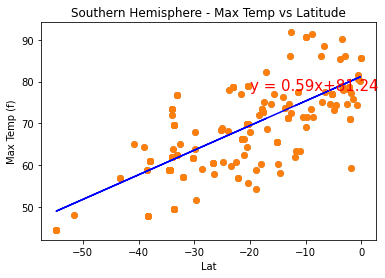

In [20]:
plt.scatter(southern_hemisphere_df["Lat"], southern_hemisphere_df["Max Temp"], alpha = 0.5)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(southern_hemisphere_df["Lat"],southern_hemisphere_df ["Max Temp"])
regress_values = (southern_hemisphere_df["Lat"]) * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x" + "+" + str(round(intercept,2))
plt.scatter(southern_hemisphere_df["Lat"],southern_hemisphere_df ["Max Temp"])
plt.plot(southern_hemisphere_df["Lat"],regress_values,"b-")
plt.annotate(line_eq,(-20,78),fontsize=15,color="red")
plt.title("Southern Hemisphere - Max Temp vs Latitude")
plt.xlabel('Lat')
plt.ylabel('Max Temp (f)')
plt.savefig('southhem_maxtemp_lat.png')
plt.show()


Southern Hemisphere - Max Temp vs Latitude - Not at significant of results as the Northern Hemisphere, the sounthern hemisphere does show a linear coorelation the closer a city is to the equator the hotter it tends to be.  

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

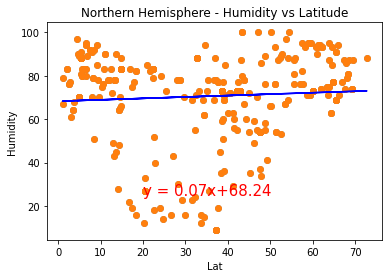

In [21]:
plt.scatter(northern_hemisphere_df["Lat"], northern_hemisphere_df["Humidity"], alpha = 0.5)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(northern_hemisphere_df["Lat"],northern_hemisphere_df ["Humidity"])
regress_values = (northern_hemisphere_df["Lat"]) * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x" + "+" + str(round(intercept,2))
plt.scatter(northern_hemisphere_df["Lat"],northern_hemisphere_df ["Humidity"])
plt.plot(northern_hemisphere_df["Lat"],regress_values,"b-")
plt.annotate(line_eq,(20,25),fontsize=15,color="red")
plt.title("Northern Hemisphere - Humidity vs Latitude")
plt.xlabel('Lat')
plt.ylabel('Humidity')
plt.savefig('northhem_humid_lat.png')
plt.show()


Northern Hemisphere - Humidity vs Latitude - There doen't seem to be much of a relationship between the distance to the equator and the humidity.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

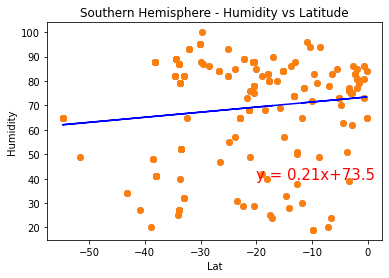

In [22]:
plt.scatter(southern_hemisphere_df["Lat"], southern_hemisphere_df["Humidity"], alpha = 0.5)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(southern_hemisphere_df["Lat"],southern_hemisphere_df ["Humidity"])
regress_values = (southern_hemisphere_df["Lat"]) * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x" + "+" + str(round(intercept,2))
plt.scatter(southern_hemisphere_df["Lat"],southern_hemisphere_df ["Humidity"])
plt.plot(southern_hemisphere_df["Lat"],regress_values,"b-")
plt.annotate(line_eq,(-20,40),fontsize=15,color="red")
plt.title("Southern Hemisphere - Humidity vs Latitude")
plt.xlabel('Lat')
plt.ylabel('Humidity')
plt.savefig('southhem_humid_lat.png')
plt.show()


Southern Hemisphere - Humidity vs Latitude - There is slight but not much coorleation between the distance to the equator and the humidity.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

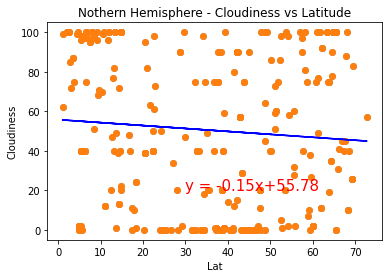

In [23]:
plt.scatter(northern_hemisphere_df["Lat"], northern_hemisphere_df["Cloudiness"], alpha = 0.5)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(northern_hemisphere_df["Lat"],northern_hemisphere_df ["Cloudiness"])
regress_values = (northern_hemisphere_df["Lat"]) * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x" + "+" + str(round(intercept,2))
plt.scatter(northern_hemisphere_df["Lat"],northern_hemisphere_df ["Cloudiness"])
plt.plot(northern_hemisphere_df["Lat"],regress_values,"b-")
plt.annotate(line_eq,(30,20),fontsize=15,color="red")
plt.title("Nothern Hemisphere - Cloudiness vs Latitude")
plt.xlabel('Lat')
plt.ylabel('Cloudiness')
plt.savefig('northhem_cloud_lat.png')
plt.show()


Northern Hemisphere - Cloudiness vs Latitude - There is slight but not much coorleation between the distance to the equator and cloud cover but not a significatn amount.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

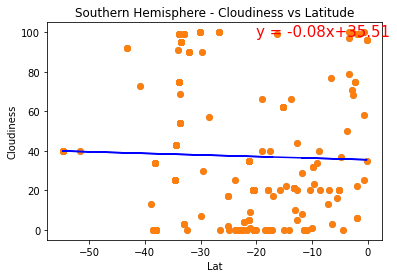

In [24]:
plt.scatter(southern_hemisphere_df["Lat"], southern_hemisphere_df["Cloudiness"], alpha = 0.5)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(southern_hemisphere_df["Lat"],southern_hemisphere_df ["Cloudiness"])
regress_values = (southern_hemisphere_df["Lat"]) * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x" + "+" + str(round(intercept,2))
plt.scatter(southern_hemisphere_df["Lat"],southern_hemisphere_df ["Cloudiness"])
plt.plot(southern_hemisphere_df["Lat"],regress_values,"b-")
plt.annotate(line_eq,(-20,98),fontsize=15,color="red")
plt.title("Southern Hemisphere - Cloudiness vs Latitude")
plt.xlabel('Lat')
plt.ylabel('Cloudiness')
plt.savefig('southhem_cloud_lat.png')
plt.show()


Southern Hemisphere - Cloudiness vs Latitude - There is no real relationship between clouds and latitude in the sounther hemisphere.  

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

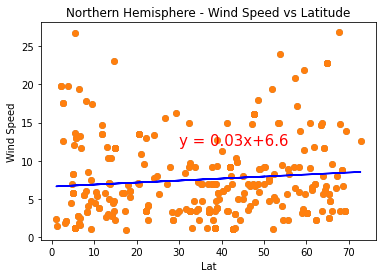

In [25]:
plt.scatter(northern_hemisphere_df["Lat"], northern_hemisphere_df["Wind Speed"], alpha = 0.5)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(northern_hemisphere_df["Lat"],northern_hemisphere_df ["Wind Speed"])
regress_values = (northern_hemisphere_df["Lat"]) * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x" + "+" + str(round(intercept,2))
plt.scatter(northern_hemisphere_df["Lat"],northern_hemisphere_df ["Wind Speed"])
plt.plot(northern_hemisphere_df["Lat"],regress_values,"b-")
plt.annotate(line_eq,(30,12),fontsize=15,color="red")
plt.title("Northern Hemisphere - Wind Speed vs Latitude")
plt.xlabel('Lat')
plt.ylabel('Wind Speed')
plt.savefig('northhem_windsp_lat.png')
plt.show()

Northern Hemisphere - Wind vs Latitude - There is no real relationship between wind and latitude in the northern hemisphere.  

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

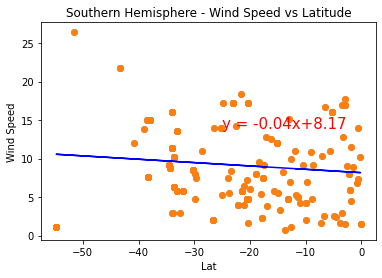

In [26]:
plt.scatter(southern_hemisphere_df["Lat"], southern_hemisphere_df["Wind Speed"], alpha = 0.5)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(southern_hemisphere_df["Lat"],southern_hemisphere_df ["Wind Speed"])
regress_values = (southern_hemisphere_df["Lat"]) * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x" + "+" + str(round(intercept,2))
plt.scatter(southern_hemisphere_df["Lat"],southern_hemisphere_df ["Wind Speed"])
plt.plot(southern_hemisphere_df["Lat"],regress_values,"b-")
plt.annotate(line_eq,(-25,14),fontsize=15,color="red")
plt.title("Southern Hemisphere - Wind Speed vs Latitude")
plt.xlabel('Lat')
plt.ylabel('Wind Speed')
plt.savefig('southhem_windsp_lat.png')
plt.show()


Southern Hemisphere - Wind vs Latitude - There is no real relationship between wind speed and latitude in the sounther hemisphere.  